# Measurement Description

Voltage is fixed at 1450V. 
Since there is no driver for the optical attenuator, these measurements must be done semi-manually. I change the value on the attenuator, then launch a cell to gather the data.

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import time

from drivers.tektronix.TDS2024B import TDS2024B

In [8]:
scope = TDS2024B("USB0::0x0699::0x036A::C100158::INSTR")
print(scope.query_idn())


TEKTRONIX,TDS 2024B,C100158,CF:91.1CT FV:v22.16



In [ ]:
timestamp = time.strftime("%Y%m%d-%H%M%S")
h5_filepath=f'analysis/data/pmt_light_attenuation/signals_{timestamp}.h5'
f = h5py.File(h5_filepath, 'w')

def query_waveforms():
    sigs_ch1 = []
    sigs_ch2 = []
    for i in range(5):
        sigs_ch1.append(scope.query_Waveform(1))
        sigs_ch2.append(scope.query_Waveform(2))
    return sigs_ch1, sigs_ch2

def save_waveforms(att, sigs_ch1, sigs_ch2):
    f.create_group(att)
    f[att].create_group('CH1')
    f[att].create_group('CH2')

    for i, sig in enumerate(sigs_ch1):
        f[att]['CH1'].create_dataset(f'{i}', data=sig)

    for i, sig in enumerate(sigs_ch2):
        f[att]['CH2'].create_dataset(f'{i}', data=sig)

def plot_waveforms(att, sigs_ch1, sigs_ch2):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))
    for i, sig in enumerate(sigs_ch1):
        ax[0].plot(sig['t'], sig['V'], linewidth=0.5, label=f'{i}')
        ax[0].set_title(f'CH1 {att} dB')
        ax[0].set_xlabel('t (s)')
        ax[0].set_ylabel('V (V)')
        ax[0].legend()
    for i, sig in enumerate(sigs_ch2):
        ax[1].plot(sig['t'], sig['V'], linewidth=0.5, label=f'{i}')
        ax[1].set_title(f'CH2 {att} dB')
        ax[1].set_xlabel('t (s)')
        ax[1].set_ylabel('V (V)')
        ax[1].legend()
    plt.tight_layout()
    plt.plot()

def query_and_save_waveforms(attenuation_db, show_plots=True):
    sigs_ch1, sigs_ch2 = query_waveforms()

    att = str(attenuation_db)
    save_waveforms(att, sigs_ch1, sigs_ch2)
    if show_plots:
        plot_waveforms(att, sigs_ch1, sigs_ch2)
    

    
    

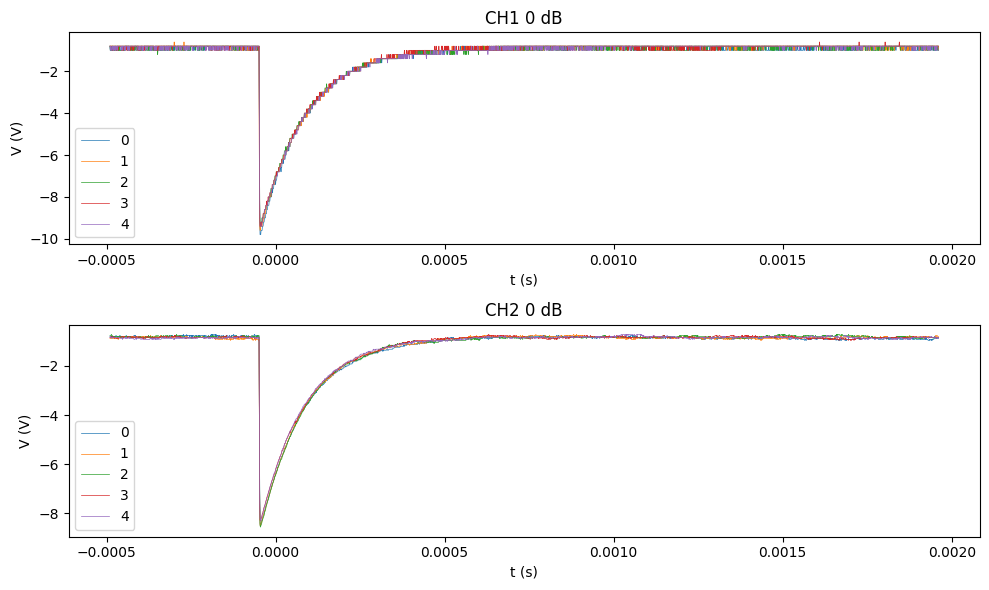

In [16]:
query_and_save_waveforms(0)

In [ ]:
query_and_save_waveforms(1)

In [ ]:
query_and_save_waveforms(2)

In [ ]:
query_and_save_waveforms(3)

In [ ]:
query_and_save_waveforms(4)

In [ ]:
query_and_save_waveforms(5)

In [ ]:
query_and_save_waveforms(6)

In [ ]:
query_and_save_waveforms(7)

In [ ]:
query_and_save_waveforms(8)

In [ ]:
query_and_save_waveforms(9)

In [ ]:
query_and_save_waveforms(10)

In [ ]:
query_and_save_waveforms(12)

In [ ]:
query_and_save_waveforms(14)

In [ ]:
query_and_save_waveforms(16)

In [ ]:
query_and_save_waveforms(18)

In [ ]:
query_and_save_waveforms(20)

In [ ]:
query_and_save_waveforms(22)

In [ ]:
query_and_save_waveforms(24)

In [ ]:
query_and_save_waveforms(26)

In [ ]:
query_and_save_waveforms(28)

In [ ]:
query_and_save_waveforms(30)